In [71]:
%matplotlib inline
import gradio as gr
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import feyn
from sklearn.model_selection import train_test_split
import xgboost as xg 
from sklearn.svm import SVR 
from sklearn import metrics
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LassoCV, Lasso
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold, cross_val_score
from datetime import datetime
pd.set_option("display.max_rows", None, "display.max_columns", None)

In [72]:
df=pd.read_csv('/Users/yashwanthkaruparthi/Developer/energy_demand/resrc/data/8-feat-eng/feat-lag.csv')

In [73]:
df.head()

,Unnamed: 0,index,datetime,temp,dew_point_temp,rel_hum,wind_speed,visibility,press,wind_chill,daily_demand,hmdxx,temp_min,temp_max,temp_mean,temp_median,dew_point_temp_min,dew_point_temp_max,dew_point_temp_mean,dew_point_temp_median,rel_hum_min,rel_hum_max,rel_hum_mean,rel_hum_median,visibility_min,visibility_max,visibility_mean,visibility_median,press_min,press_max,press_mean,press_median,hmdxx_min,hmdxx_max,hmdxx_mean,hmdxx_median,date,month,year,demand_rolling_mean_3,demand_rolling_std_7,temp_roll_mean,temp_roll_std,rel_hum_roll_mean,rel_hum_roll_std,demand_lag_1,rel_hum_lag_1,wind_speed_lag_1,demand_lag_2,rel_hum_lag_2,wind_speed_lag_2,demand_lag_3,rel_hum_lag_3,wind_speed_lag_3,demand_lag_4,rel_hum_lag_4,wind_speed_lag_4,demand_lag_5,rel_hum_lag_5,wind_speed_lag_5,demand_lag_6,rel_hum_lag_6,wind_speed_lag_6,demand_lag_7,rel_hum_lag_7,wind_speed_lag_7,temp_humidity_interaction,temp_wind_speed_interaction
0,0,0,1994-01-01,0.575000,-1.387500,87.000000,20.333333,17.841667,99.075833,-5.888889,14655.208333,-1.884900,-1.8,2.8,0.575000,0.65,-4.8,1.1,-1.387500,-0.65,73.0,99.0,87.000000,86.5,0.8,40.2,17.841667,16.1,98.51,99.91,99.075833,98.840,-4.976663,0.686009,-1.884900,-1.513575,1,1,1994,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,50.025000,11.691667
1,1,1,1994-01-02,-8.704167,-12.445833,74.416667,17.875000,28.387500,99.920000,-16.681818,15783.333333,-12.827363,-14.3,1.7,-8.704167,-9.90,-20.3,0.5,-12.445833,-13.90,60.0,92.0,74.416667,75.5,6.4,40.2,28.387500,25.0,98.77,100.51,99.920000,100.125,-19.165499,-0.338394,-12.827363,-14.393998,2,1,1994,NaN,NaN,NaN,NaN,NaN,NaN,14655.208333,87.000000,20.333333,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-647.735069,-155.586979
2,2,2,1994-01-03,-12.612500,-15.820833,77.250000,17.666667,10.404167,100.057083,-20.583333,18992.708333,-17.143932,-16.3,-10.3,-12.612500,-12.00,-23.2,-12.6,-15.820833,-15.00,55.0,91.0,77.250000,80.5,1.2,25.0,10.404167,8.0,99.41,100.47,100.057083,100.155,-21.317386,-14.555717,-17.143932,-16.423198,3,1,1994,16477.083333,NaN,NaN,NaN,NaN,NaN,15783.333333,74.416667,17.875000,14655.208333,87.000000,20.333333,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-974.315625,-222.820833
3,3,3,1994-01-04,-9.833333,-13.570833,74.416667,25.791667,24.879167,98.675417,-18.541667,19080.708333,-14.183286,-11.5,-7.4,-9.833333,-9.95,-15.0,-11.5,-13.570833,-13.70,57.0,84.0,74.416667,76.0,9.7,40.2,24.879167,24.1,98.27,99.34,98.675417,98.610,-15.874948,-11.706660,-14.183286,-14.310177,4,1,1994,17952.250000,NaN,NaN,NaN,NaN,NaN,18992.708333,77.250000,17.666667,15783.333333,74.416667,17.875000,14655.208333,87.000000,20.333333,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-731.763889,-253.618056
4,4,4,1994-01-05,-11.866667,-16.154167,70.791667,22.875000,27.033333,99.352083,-20.521739,19183.208333,-16.407695,-17.5,-7.2,-11.866667,-11.75,-20.8,-10.7,-16.154167,-17.00,56.0,84.0,70.791667,74.0,1.0,40.2,27.033333,25.0,98.44,100.37,99.352083,99.375,-22.394182,-11.256395,-16.407695,-16.464188,5,1,1994,19085.541667,NaN,NaN,NaN,NaN,NaN,19080.708333,74.416667,25.791667,18992.708333,77.250000,17.666667,15783.333333,74.416667,17.875000,14655.208333,87.0,20.333333,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-840.061111,-271.450000


In [74]:
df.columns

Index(['Unnamed: 0', 'index', 'datetime', 'temp', 'dew_point_temp', 'rel_hum',
       'wind_speed', 'visibility', 'press', 'wind_chill', 'daily_demand',
       'hmdxx', 'temp_min', 'temp_max', 'temp_mean', 'temp_median',
       'dew_point_temp_min', 'dew_point_temp_max', 'dew_point_temp_mean',
       'dew_point_temp_median', 'rel_hum_min', 'rel_hum_max', 'rel_hum_mean',
       'rel_hum_median', 'visibility_min', 'visibility_max', 'visibility_mean',
       'visibility_median', 'press_min', 'press_max', 'press_mean',
       'press_median', 'hmdxx_min', 'hmdxx_max', 'hmdxx_mean', 'hmdxx_median',
       'date', 'month', 'year', 'demand_rolling_mean_3',
       'demand_rolling_std_7', 'temp_roll_mean', 'temp_roll_std',
       'rel_hum_roll_mean', 'rel_hum_roll_std', 'demand_lag_1',
       'rel_hum_lag_1', 'wind_speed_lag_1', 'demand_lag_2', 'rel_hum_lag_2',
       'wind_speed_lag_2', 'demand_lag_3', 'rel_hum_lag_3', 'wind_speed_lag_3',
       'demand_lag_4', 'rel_hum_lag_4', 'wind_speed_lag_

In [42]:
df.drop(columns=['Unnamed: 0', 'index', 'temp', 'dew_point_temp', 'rel_hum','wind_speed', 'visibility', 'press', 'wind_chill', 'hmdxx', 'temp_min', 'temp_max', 'temp_mean', 'temp_median',
       'dew_point_temp_min', 'dew_point_temp_max', 'dew_point_temp_mean',
       'dew_point_temp_median', 'rel_hum_min', 'rel_hum_max', 'rel_hum_mean',
       'rel_hum_median', 'visibility_min', 'visibility_max', 'visibility_mean',
       'visibility_median', 'press_min', 'press_max', 'press_mean',
       'press_median', 'hmdxx_min', 'hmdxx_max', 'hmdxx_mean', 'hmdxx_median',
       'week_of_year', 'day_of_week', 'year', 'month', 'day', 'temp_roll_mean',
       'temp_roll_std', 'rel_hum_roll_mean', 'rel_hum_roll_std', 'rel_hum_lag_1', 'wind_speed_lag_1',
       'rel_hum_lag_2', 'wind_speed_lag_2', 'rel_hum_lag_3',
       'wind_speed_lag_3', 'rel_hum_lag_4', 'wind_speed_lag_4', 'rel_hum_lag_5', 'wind_speed_lag_5', 'rel_hum_lag_7',
       'wind_speed_lag_7', 'temp_humidity_interaction',
       'temp_wind_speed_interaction', 'rel_hum_lag_6', 'wind_speed_lag_6', 'demand_lag_2'], inplace = True)

In [43]:
df.columns

Index(['daily_demand', 'demand_rolling_mean_3', 'demand_rolling_std_7',
       'demand_lag_1', 'demand_lag_3', 'demand_lag_4', 'demand_lag_5',
       'demand_lag_6', 'demand_lag_7'],
      dtype='object')

In [44]:
qtrain, qtest = feyn.tools.split(df, ratio=[0.6, 0.4], random_state=42)
qytest = qtest.loc[:, 'daily_demand'].values
qytest

array([17111.5       , 18378.04166667, 17100.70833333, ...,
       20836.08333333, 16784.20833333, 16325.45833333])

In [45]:
# Instantiate a QLattice
ql = feyn.QLattice(random_seed=42)

# Sample and fit models
qmodels = ql.auto_run(
    data=qtrain,
    output_name='daily_demand'
)
best = qmodels[0]

In [46]:
best.predict(qtest)

array([16749.5407771 , 17625.38993387, 16726.8891473 , ...,
       21185.88372143, 16864.36782407, 17105.54137157])

<?xml version="1.0" encoding="utf-8" ?>
<svg baseProfile="full" height="248.0" preserveAspectRatio="none" version="1.1" viewBox="0 0 891 248.0" width="891" xmlns="http://www.w3.org/2000/svg" xmlns:ev="http://www.w3.org/2001/xml-events" xmlns:xlink="http://www.w3.org/1999/xlink"><defs /><svg class="graph" height="155.0" width="711" x="0" y="0"><defs /><rect class="node" fill="#00F082" height="35" stroke="#1E1E1E" stroke-width="1" width="90" x="601" y="50.0"><title>daily_demand
linear:
scale=4591.875000
scale offset=0.000000
w=0.765175
bias=3.8826</title></rect><text fill="#1E1E1E" font-family="monospace" font-size="12" style="pointer-events:none" text-anchor="middle" x="646.0" y="71.5">daily_de..</text><text fill="#1E1E1E" font-family="monospace" font-size="10" style="pointer-events:none" text-anchor="end" x="689" y="59.0">0</text><text fill="#1E1E1E" font-family="monospace" font-size="10" style="pointer-events:none" text-anchor="start" x="603" y="59.0">out</text><line stroke="#1E1E1E" x1="571" x2="601" y1="67.5" y2="67.5" /><rect class="node" fill="#FAFAFA" height="35" stroke="#FF1EC8" stroke-width="1" width="90" x="481" y="50.0"><title>add</title></rect><text fill="#1E1E1E" font-family="monospace" font-size="12" style="pointer-events:none" text-anchor="middle" x="526.0" y="71.5">add</text><text fill="#1E1E1E" font-family="monospace" font-size="10" style="pointer-events:none" text-anchor="end" x="569" y="59.0">1</text><line stroke="#1E1E1E" x1="451" x2="481" y1="37.5" y2="58.5" /><line stroke="#1E1E1E" x1="451" x2="481" y1="97.5" y2="76.5" /><rect class="node" fill="#FAFAFA" height="35" stroke="#FF1EC8" stroke-width="1" width="90" x="361" y="20.0"><title>add</title></rect><text fill="#1E1E1E" font-family="monospace" font-size="12" style="pointer-events:none" text-anchor="middle" x="406.0" y="41.5">add</text><text fill="#1E1E1E" font-family="monospace" font-size="10" style="pointer-events:none" text-anchor="end" x="449" y="29.0">2</text><line stroke="#1E1E1E" x1="331" x2="361" y1="37.5" y2="28.5" /><line stroke="#1E1E1E" x1="331" x2="361" y1="97.5" y2="46.5" /><rect class="node" fill="#FAFAFA" height="35" stroke="#FF1EC8" stroke-width="1" width="90" x="241" y="20.0"><title>multiply</title></rect><text fill="#1E1E1E" font-family="monospace" font-size="12" style="pointer-events:none" text-anchor="middle" x="286.0" y="41.5">multiply</text><text fill="#1E1E1E" font-family="monospace" font-size="10" style="pointer-events:none" text-anchor="end" x="329" y="29.0">3</text><line stroke="#1E1E1E" x1="211" x2="241" y1="37.5" y2="28.5" /><line stroke="#1E1E1E" x1="211" x2="241" y1="97.5" y2="46.5" /><rect class="node" fill="#00F082" height="35" stroke="#1E1E1E" stroke-width="1" width="90" x="121" y="20.0"><title>demand_lag_3
linear:
scale=0.000210
scale offset=17281.997947
w=2.615590
bias=3.0025</title></rect><text fill="#1E1E1E" font-family="monospace" font-size="12" style="pointer-events:none" text-anchor="middle" x="166.0" y="41.5">..mand_lag_3</text><text fill="#1E1E1E" font-family="monospace" font-size="10" style="pointer-events:none" text-anchor="end" x="209" y="29.0">4</text><text fill="#1E1E1E" font-family="monospace" font-size="10" style="pointer-events:none" text-anchor="start" x="123" y="29.0">num</text><rect class="node" fill="#FAFAFA" height="35" stroke="#FF1EC8" stroke-width="1" width="90" x="121" y="80.0"><title>add</title></rect><text fill="#1E1E1E" font-family="monospace" font-size="12" style="pointer-events:none" text-anchor="middle" x="166.0" y="101.5">add</text><text fill="#1E1E1E" font-family="monospace" font-size="10" style="pointer-events:none" text-anchor="end" x="209" y="89.0">5</text><line stroke="#1E1E1E" x1="91" x2="121" y1="37.5" y2="88.5" /><line stroke="#1E1E1E" x1="91" x2="121" y1="97.5" y2="106.5" /><rect class="node" fill="#00F082" height="35" stroke="#1E1E1E" stroke-width="1" width="90" x="1" y="20.0"><title>demand_rolling_mean_3
linear:
scale=0.000230
scale offset=17342.188735
w=0.342092
bias=-0.7138</ti
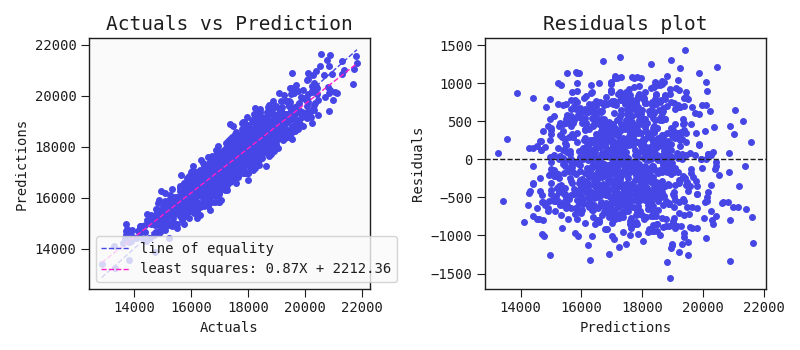

In [47]:
best.plot(qtest)

# making lag feature with lag of 364 days

In [191]:
df_lag=pd.read_csv('/Users/yashwanthkaruparthi/Developer/energy_demand/resrc/data/8-feat-eng/feat-lag.csv')

In [192]:
df_lag.tail()

,Unnamed: 0,index,datetime,temp,dew_point_temp,rel_hum,wind_speed,visibility,press,wind_chill,daily_demand,hmdxx,temp_min,temp_max,temp_mean,temp_median,dew_point_temp_min,dew_point_temp_max,dew_point_temp_mean,dew_point_temp_median,rel_hum_min,rel_hum_max,rel_hum_mean,rel_hum_median,visibility_min,visibility_max,visibility_mean,visibility_median,press_min,press_max,press_mean,press_median,hmdxx_min,hmdxx_max,hmdxx_mean,hmdxx_median,date,month,year,demand_rolling_mean_3,demand_rolling_std_7,temp_roll_mean,temp_roll_std,rel_hum_roll_mean,rel_hum_roll_std,demand_lag_1,rel_hum_lag_1,wind_speed_lag_1,demand_lag_2,rel_hum_lag_2,wind_speed_lag_2,demand_lag_3,rel_hum_lag_3,wind_speed_lag_3,demand_lag_4,rel_hum_lag_4,wind_speed_lag_4,demand_lag_5,rel_hum_lag_5,wind_speed_lag_5,demand_lag_6,rel_hum_lag_6,wind_speed_lag_6,demand_lag_7,rel_hum_lag_7,wind_speed_lag_7,temp_humidity_interaction,temp_wind_speed_interaction
9126,9126,9126,2018-12-27,-2.541667,-6.575000,74.166667,17.750000,23.633333,100.791667,-9.166667,15698.625000,-5.917272,-6.9,2.5,-2.541667,-1.95,-12.7,0.0,-6.575000,-5.35,61.0,83.0,74.166667,77.0,12.9,24.1,23.633333,24.1,99.31,101.50,100.791667,101.075,-11.155717,0.336425,-5.917272,-5.212529,27,12,2018,15024.958333,524.060081,-0.482738,1.750450,76.160714,5.753442,14753.791667,72.458333,16.125000,14622.458333,75.083333,8.125000,15237.666667,80.250000,18.291667,15609.375000,73.500000,8.958333,15706.791667,70.416667,30.500000,16013.000000,87.250000,24.958333,16350.000000,77.375000,7.708333,-188.506944,-45.114583
9127,9127,9127,2018-12-28,8.016667,6.254167,88.833333,15.750000,17.204167,98.661667,NaN,14809.208333,7.868511,2.7,12.4,8.016667,8.35,0.4,10.8,6.254167,7.25,74.0,95.0,88.833333,91.5,3.6,24.1,17.204167,24.1,98.37,99.21,98.661667,98.635,0.738694,13.912823,7.868511,8.262797,28,12,2018,15087.208333,476.032273,0.238095,3.536947,76.386905,6.270001,15698.625000,74.166667,17.750000,14753.791667,72.458333,16.125000,14622.458333,75.083333,8.125000,15237.666667,80.250000,18.291667,15609.375000,73.500000,8.958333,15706.791667,70.416667,30.500000,16013.000000,87.250000,24.958333,712.147222,126.262500
9128,9128,9128,2018-12-29,-2.525000,-7.520833,68.875000,19.916667,24.033333,99.903750,-9.722222,15135.791667,-6.063010,-7.0,3.6,-2.525000,-3.05,-11.4,-0.6,-7.520833,-9.35,56.0,80.0,68.875000,71.0,22.5,24.1,24.033333,24.1,98.85,100.43,99.903750,100.135,-11.125707,1.291505,-6.063010,-7.026121,29,12,2018,15214.541667,421.610763,0.079762,3.646481,76.166667,6.536091,14809.208333,88.833333,15.750000,15698.625000,74.166667,17.750000,14753.791667,72.458333,16.125000,14622.458333,75.083333,8.125000,15237.666667,80.250000,18.291667,15609.375000,73.500000,8.958333,15706.791667,70.416667,30.500000,-173.909375,-50.289583
9129,9129,9129,2018-12-30,-2.404167,-5.829167,77.666667,10.958333,19.358333,99.869167,-6.150000,15326.625000,-5.735336,-6.4,0.6,-2.404167,-1.60,-10.5,-2.8,-5.829167,-5.40,68.0,88.0,77.666667,75.5,1.6,24.1,19.358333,24.1,99.65,100.15,99.869167,99.870,-10.147759,-2.448366,-5.735336,-4.982904,30,12,2018,15090.541667,378.702437,-0.185714,3.765327,76.761905,6.441812,15135.791667,68.875000,19.916667,14809.208333,88.833333,15.750000,15698.625000,74.166667,17.750000,14753.791667,72.458333,16.125000,14622.458333,75.083333,8.125000,15237.666667,80.250000,18.291667,15609.375000,73.500000,8.958333,-186.723611,-26.345660
9130,9130,9130,2018-12-31,1.204167,-1.645833,81.708333,10.458333,18.091667,99.302500,-3.000000,15016.208333,-1.278330,-2.0,4.3,1.204167,2.25,-6.4,3.4,-1.645833,-1.30,65.0,94.0,81.708333,82.5,4.8,24.1,18.091667,24.1,97.37,100.03,99.302500,99.695,-5.229812,3.073132,-1.278330,0.062595,31,12,2018,15159.541667,372.877700,-0.051190,3.800665,76.970238,6.595177,15326.625000,77.666667,10.958333,15135.791667,68.875000,19.916667,14809.208333,88.833333,15.750000,15698.625000,74.166667,17.750000,14753.791667,72.458333,16.125000,14622.458333,75.083333,8.125000,15237.666667,80.250000,18.291667,98.390451,12.593576


In [193]:
# df_lag = df_lag.set_index(df_lag.index.to_datetime())
df_lag = df_lag.set_index('datetime')


In [194]:
target_map = df_lag['daily_demand'].to_dict()

In [195]:
if not pd.api.types.is_datetime64_dtype(df_lag.index):
  print("Index is not a datetime type. Conversion might be needed.")

Index is not a datetime type. Conversion might be needed.


In [196]:
try:
  df_lag.index = pd.to_datetime(df_lag.index)  # Attempt conversion
except (ValueError, pd.errors.OutOfBoundsDatetime):
  print("Error: Unable to convert index to datetime format. Check for invalid date strings.")


In [197]:
df_lag['demand_lag_1yr'] = df_lag['daily_demand'].shift(364)
df_lag['demand_lag_2yr'] = df_lag['daily_demand'].shift(728)
df_lag['demand_lag_3yr'] = df_lag['daily_demand'].shift(1092)

In [198]:
# def add_lags(df):
#   df['lag_1yr'] = (df_lag.index - pd.Timedelta('364 days')).map(target_map)
#   # df['demand_lag_2yr'] = (df_lag.index - pd.Timedelta('728 days')).map(target_map)
#   # df['demand_lag_3yr'] = (df_lag.index - pd.Timedelta('1092 days')).map(target_map)
#   return df

In [199]:
# df_lag = add_lags(df_lag)

In [200]:
df_lag.tail()

,Unnamed: 0,index,temp,dew_point_temp,rel_hum,wind_speed,visibility,press,wind_chill,daily_demand,hmdxx,temp_min,temp_max,temp_mean,temp_median,dew_point_temp_min,dew_point_temp_max,dew_point_temp_mean,dew_point_temp_median,rel_hum_min,rel_hum_max,rel_hum_mean,rel_hum_median,visibility_min,visibility_max,visibility_mean,visibility_median,press_min,press_max,press_mean,press_median,hmdxx_min,hmdxx_max,hmdxx_mean,hmdxx_median,date,month,year,demand_rolling_mean_3,demand_rolling_std_7,temp_roll_mean,temp_roll_std,rel_hum_roll_mean,rel_hum_roll_std,demand_lag_1,rel_hum_lag_1,wind_speed_lag_1,demand_lag_2,rel_hum_lag_2,wind_speed_lag_2,demand_lag_3,rel_hum_lag_3,wind_speed_lag_3,demand_lag_4,rel_hum_lag_4,wind_speed_lag_4,demand_lag_5,rel_hum_lag_5,wind_speed_lag_5,demand_lag_6,rel_hum_lag_6,wind_speed_lag_6,demand_lag_7,rel_hum_lag_7,wind_speed_lag_7,temp_humidity_interaction,temp_wind_speed_interaction,demand_lag_1yr,demand_lag_2yr,demand_lag_3yr
datetime,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2018-12-27,9126,9126,-2.541667,-6.575000,74.166667,17.750000,23.633333,100.791667,-9.166667,15698.625000,-5.917272,-6.9,2.5,-2.541667,-1.95,-12.7,0.0,-6.575000,-5.35,61.0,83.0,74.166667,77.0,12.9,24.1,23.633333,24.1,99.31,101.50,100.791667,101.075,-11.155717,0.336425,-5.917272,-5.212529,27,12,2018,15024.958333,524.060081,-0.482738,1.750450,76.160714,5.753442,14753.791667,72.458333,16.125000,14622.458333,75.083333,8.125000,15237.666667,80.250000,18.291667,15609.375000,73.500000,8.958333,15706.791667,70.416667,30.500000,16013.000000,87.250000,24.958333,16350.000000,77.375000,7.708333,-188.506944,-45.114583,17830.083333,15425.500000,14890.958333
2018-12-28,9127,9127,8.016667,6.254167,88.833333,15.750000,17.204167,98.661667,NaN,14809.208333,7.868511,2.7,12.4,8.016667,8.35,0.4,10.8,6.254167,7.25,74.0,95.0,88.833333,91.5,3.6,24.1,17.204167,24.1,98.37,99.21,98.661667,98.635,0.738694,13.912823,7.868511,8.262797,28,12,2018,15087.208333,476.032273,0.238095,3.536947,76.386905,6.270001,15698.625000,74.166667,17.750000,14753.791667,72.458333,16.125000,14622.458333,75.083333,8.125000,15237.666667,80.250000,18.291667,15609.375000,73.500000,8.958333,15706.791667,70.416667,30.500000,16013.000000,87.250000,24.958333,712.147222,126.262500,17531.083333,15358.208333,14226.500000
2018-12-29,9128,9128,-2.525000,-7.520833,68.875000,19.916667,24.033333,99.903750,-9.722222,15135.791667,-6.063010,-7.0,3.6,-2.525000,-3.05,-11.4,-0.6,-7.520833,-9.35,56.0,80.0,68.875000,71.0,22.5,24.1,24.033333,24.1,98.85,100.43,99.903750,100.135,-11.125707,1.291505,-6.063010,-7.026121,29,12,2018,15214.541667,421.610763,0.079762,3.646481,76.166667,6.536091,14809.208333,88.833333,15.750000,15698.625000,74.166667,17.750000,14753.791667,72.458333,16.125000,14622.458333,75.083333,8.125000,15237.666667,80.250000,18.291667,15609.375000,73.500000,8.958333,15706.791667,70.416667,30.500000,-173.909375,-50.289583,17003.416667,14862.208333,14793.833333
2018-12-30,9129,9129,-2.404167,-5.829167,77.666667,10.958333,19.358333,99.869167,-6.150000,15326.625000,-5.735336,-6.4,0.6,-2.404167,-1.60,-10.5,-2.8,-5.829167,-5.40,68.0,88.0,77.666667,75.5,1.6,24.1,19.358333,24.1,99.65,100.15,99.869167,99.870,-10.147759,-2.448366,-5.735336,-4.982904,30,12,2018,15090.541667,378.702437,-0.185714,3.765327,76.761905,6.441812,15135.791667,68.875000,19.916667,14809.208333,88.833333,15.750000,15698.625000,74.166667,17.750000,14753.791667,72.458333,16.125000,14622.458333,75.083333,8.125000,15237.666667,80.250000,18.291667,15609.375000,73.500000,8.958333,-186.723611,-26.345660,17229.541667,13947.333333,15193.541667
2018-12-31,9130,9130,1.204167,-1.645833,81.708333,10.458333,18.091667,99.302500,-3.000000,15016.208333,-1.278330,-2.0,4.3,1.204167,2.25,-6.4,3.4,-1.645833,-1.30,65.0,94.0,81.708333,82.5,4.8,24.1,18.091667,24.1,97.37,100.03,99.302500,99.695,-5.229812,3.073132,-1.278330,0.062595,31,12,2018,15159.541667,372.877700,-0.051190,3.800665,76.970238,6.595177,15326.625000,77.666667,10.958333,

In [201]:
df_lag.columns

Index(['Unnamed: 0', 'index', 'temp', 'dew_point_temp', 'rel_hum',
       'wind_speed', 'visibility', 'press', 'wind_chill', 'daily_demand',
       'hmdxx', 'temp_min', 'temp_max', 'temp_mean', 'temp_median',
       'dew_point_temp_min', 'dew_point_temp_max', 'dew_point_temp_mean',
       'dew_point_temp_median', 'rel_hum_min', 'rel_hum_max', 'rel_hum_mean',
       'rel_hum_median', 'visibility_min', 'visibility_max', 'visibility_mean',
       'visibility_median', 'press_min', 'press_max', 'press_mean',
       'press_median', 'hmdxx_min', 'hmdxx_max', 'hmdxx_mean', 'hmdxx_median',
       'date', 'month', 'year', 'demand_rolling_mean_3',
       'demand_rolling_std_7', 'temp_roll_mean', 'temp_roll_std',
       'rel_hum_roll_mean', 'rel_hum_roll_std', 'demand_lag_1',
       'rel_hum_lag_1', 'wind_speed_lag_1', 'demand_lag_2', 'rel_hum_lag_2',
       'wind_speed_lag_2', 'demand_lag_3', 'rel_hum_lag_3', 'wind_speed_lag_3',
       'demand_lag_4', 'rel_hum_lag_4', 'wind_speed_lag_4', 'demand_

In [202]:
df_lag = df_lag.reset_index()


In [203]:
df_lag.drop(columns=['Unnamed: 0', 'datetime', 'index', 'demand_rolling_mean_3',
       'demand_rolling_std_7', 'demand_lag_1',
       'demand_lag_2', 'demand_lag_3',
       'demand_lag_4', 'demand_lag_5', 'demand_lag_6', 'demand_lag_7' ], inplace = True)

In [204]:
df_lag = df_lag.dropna()

In [205]:
qtrain, qtest = feyn.tools.split(df_lag, ratio=[0.6, 0.4], random_state=42)
qytest = qtest.loc[:, 'daily_demand'].values
qytest

array([18425.58333333, 17715.75      , 18103.20833333, ...,
       16075.25      , 16648.04166667, 18635.29166667])

In [206]:
# Instantiate a QLattice
ql = feyn.QLattice(random_seed=42)

# Sample and fit models
qmodels = ql.auto_run(
    data=qtrain,
    output_name='daily_demand'
)
best = qmodels[0]

In [207]:
best.predict(qtest)

array([18388.67982778, 18409.28711237, 19019.92736304, ...,
       16347.22723976, 16540.24806838, 18422.03232544])

<?xml version="1.0" encoding="utf-8" ?>
<svg baseProfile="full" height="384.0" preserveAspectRatio="none" version="1.1" viewBox="0 0 891 384.0" width="891" xmlns="http://www.w3.org/2000/svg" xmlns:ev="http://www.w3.org/2001/xml-events" xmlns:xlink="http://www.w3.org/1999/xlink"><defs /><svg class="graph" height="275.0" width="711" x="0" y="0"><defs /><rect class="node" fill="#00F082" height="35" stroke="#1E1E1E" stroke-width="1" width="90" x="601" y="110.0"><title>daily_demand
linear:
scale=4394.729167
scale offset=0.000000
w=-1.316147
bias=1.0774</title></rect><text fill="#1E1E1E" font-family="monospace" font-size="12" style="pointer-events:none" text-anchor="middle" x="646.0" y="131.5">daily_de..</text><text fill="#1E1E1E" font-family="monospace" font-size="10" style="pointer-events:none" text-anchor="end" x="689" y="119.0">0</text><text fill="#1E1E1E" font-family="monospace" font-size="10" style="pointer-events:none" text-anchor="start" x="603" y="119.0">out</text><line stroke="#1E1E1E" x1="571" x2="601" y1="127.5" y2="127.5" /><rect class="node" fill="#FAFAFA" height="35" stroke="#FF1EC8" stroke-width="1" width="90" x="481" y="110.0"><title>add</title></rect><text fill="#1E1E1E" font-family="monospace" font-size="12" style="pointer-events:none" text-anchor="middle" x="526.0" y="131.5">add</text><text fill="#1E1E1E" font-family="monospace" font-size="10" style="pointer-events:none" text-anchor="end" x="569" y="119.0">1</text><line stroke="#1E1E1E" x1="451" x2="481" y1="97.5" y2="118.5" /><line stroke="#1E1E1E" x1="451" x2="481" y1="157.5" y2="136.5" /><rect class="node" fill="#00F082" height="35" stroke="#1E1E1E" stroke-width="1" width="90" x="361" y="80.0"><title>hmdxx_min
linear:
scale=0.070152
scale offset=-10.646343
w=0.099107
bias=-1.6233</title></rect><text fill="#1E1E1E" font-family="monospace" font-size="12" style="pointer-events:none" text-anchor="middle" x="406.0" y="101.5">hmdxx_min</text><text fill="#1E1E1E" font-family="monospace" font-size="10" style="pointer-events:none" text-anchor="end" x="449" y="89.0">2</text><text fill="#1E1E1E" font-family="monospace" font-size="10" style="pointer-events:none" text-anchor="start" x="363" y="89.0">num</text><rect class="node" fill="#FAFAFA" height="35" stroke="#FF1EC8" stroke-width="1" width="90" x="361" y="140.0"><title>multiply</title></rect><text fill="#1E1E1E" font-family="monospace" font-size="12" style="pointer-events:none" text-anchor="middle" x="406.0" y="161.5">multiply</text><text fill="#1E1E1E" font-family="monospace" font-size="10" style="pointer-events:none" text-anchor="end" x="449" y="149.0">3</text><line stroke="#1E1E1E" x1="331" x2="361" y1="97.5" y2="148.5" /><line stroke="#1E1E1E" x1="331" x2="361" y1="157.5" y2="166.5" /><rect class="node" fill="#FAFAFA" height="35" stroke="#FF1EC8" stroke-width="1" width="90" x="241" y="80.0"><title>multiply</title></rect><text fill="#1E1E1E" font-family="monospace" font-size="12" style="pointer-events:none" text-anchor="middle" x="286.0" y="101.5">multiply</text><text fill="#1E1E1E" font-family="monospace" font-size="10" style="pointer-events:none" text-anchor="end" x="329" y="89.0">4</text><line stroke="#1E1E1E" x1="211" x2="241" y1="37.5" y2="88.5" /><line stroke="#1E1E1E" x1="211" x2="241" y1="97.5" y2="106.5" /><rect class="node" fill="#00F082" height="35" stroke="#1E1E1E" stroke-width="1" width="90" x="121" y="20.0"><title>year
linear:
scale=0.090909
scale offset=2007.425868
w=0.409365
bias=-2.4090</title></rect><text fill="#1E1E1E" font-family="monospace" font-size="12" style="pointer-events:none" text-anchor="middle" x="166.0" y="41.5">year</text><text fill="#1E1E1E" font-family="monospace" font-size="10" style="pointer-events:none" text-anchor="end" x="209" y="29.0">5</text><text fill="#1E1E1E" font-family="monospace" font-size="10" style="pointer-events:none" text-anchor="start" x="123" y="29.0">num</text><rect class="node" fill="#FAFAFA" height="35" stroke="#FF1EC8" stroke-width="1" width="90" x="121" y="8
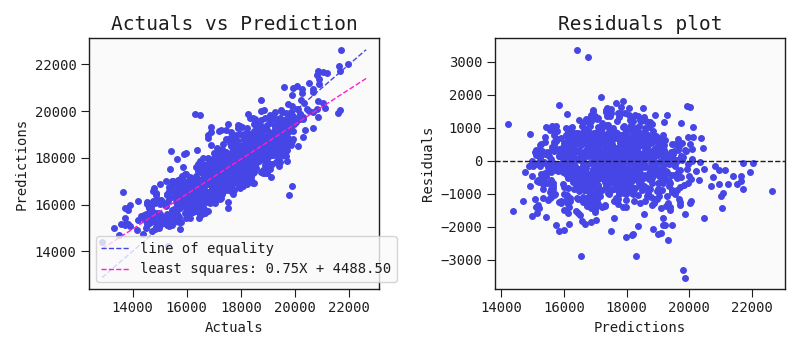

In [208]:
best.plot(qtest)